In [205]:
from collections import defaultdict
import os
import pickle
import re
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch

%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:
%autoreload 2
from lbc.analysis import summarize_rollout, plot_stats

In [210]:
def load_data(filename):
    with open(filename, "rb") as f:
        return pickle.load(f)

def run_analysis(filename, figsize=(10,3), secondary=False):
    
    data = load_data(filename)
    rollout = data["rollout"]
    
    df = summarize_rollout(rollout)
    
    if secondary is True:
        if re.match(r".*_PC", filename):
            secondary = "pc_limit"
        else:
            secondary = "energy_price"
    
    keys = [
        "zone_temp",
        "discharge_temp",
        "zone_flow",
        "total_cost",
        "total_power",
        "fan_power",
        "chiller_power", 
        "comfort_viol_deg_hr"
    ]
    
    figs = {}
    for key in keys:
        s = None if key == "zone_temp" else secondary
        fig, ax = plot_stats(rollout, key, figsize=figsize, secondary=s)
        ax.set_title(key)
        figs[key] = (fig, ax)
        
    return rollout, df, figs

# Run simple analysis/viz against output file

In [211]:
rollout = load_data("results/MPCOneShot-TOU.p")["rollout"]
rollout.show_dims()

action (25, 3, 6) batched
action_max (25, 3, 6) batched
action_min (25, 3, 6) batched
action_penalty (25,) scalar
action_viol_cost (25, 3) batched
action_viol_lower (25, 3, 6) batched
action_viol_upper (25, 3, 6) batched
chiller_power (25, 3) batched
clipped_action (25, 3, 6) batched
comfort_cost (25, 3) batched
comfort_max (25, 3) batched
comfort_min (25, 3) batched
comfort_penalty (25,) scalar
comfort_viol_deg_hr (25, 3) batched
comfort_viol_lower (25, 3, 5) batched
comfort_viol_upper (25, 3, 5) batched
energy_price (25, 3) batched
fan_power (25, 3) batched
pc_limit (25,) scalar
pc_penalty (25,) scalar
pc_violation_cost (25, 3) batched
power_cost (25, 3) batched
predicted_energy_price (25, 3) batched
temp_oa (25, 3) batched
total_cost (25, 3) batched
total_power (25, 3) batched
zone_temp (25, 3, 5) batched


,value
total_cost,1.605929e+03
action_viol_cost,2.109424e-13
power_cost,1.603018e+03
comfort_cost,2.911359e+00
pc_violation_cost,0.000000e+00
chiller_power,1.561265e+02
fan_power,1.224944e+02
total_power,2.786209e+02
comfort_viol_deg_hr,2.121650e-02


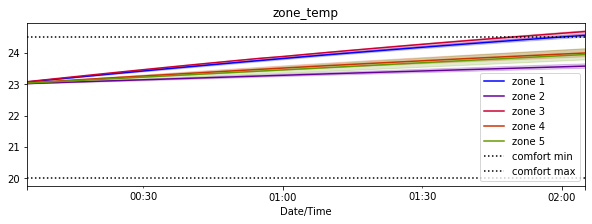

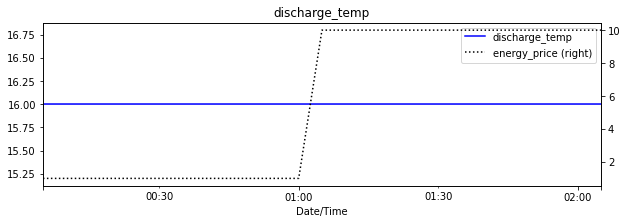

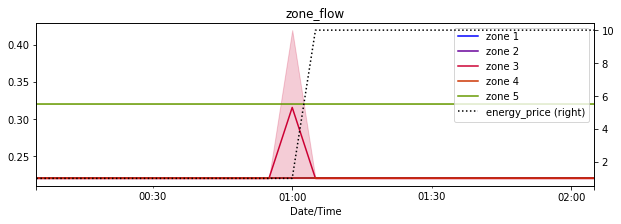

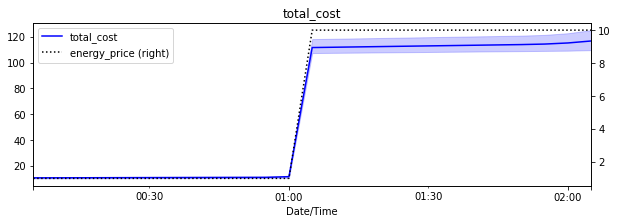

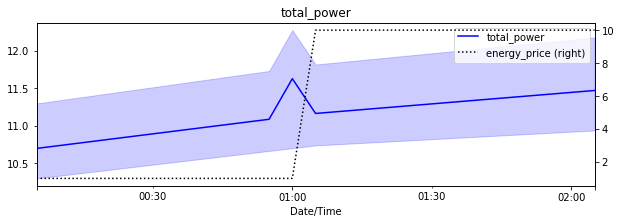

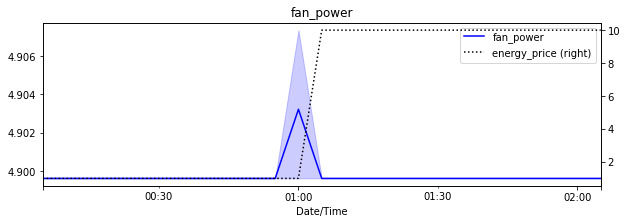

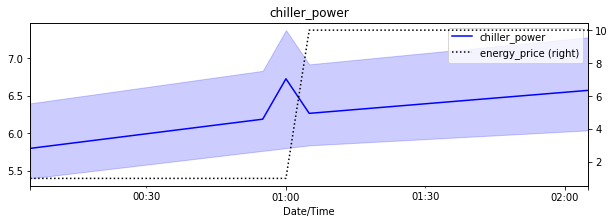

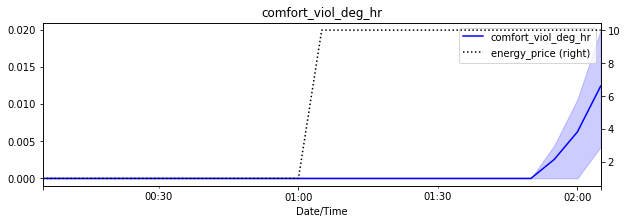

In [212]:
r, df, figs = run_analysis("results/MPCOneShot-TOU.p", secondary=True)
df